# Implementation PCA and Linear AutoEncoder

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn import datasets

## Load Iris_dara

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

## Normalization

In [ ]:
X = StandardScaler().fit_transform(X)

In [1]:
#X= (X-np.mean(X,axis=0))/np.sqrt(X.shape[0])

# PCA

In [ ]:
class Our_PCA:
    
    def __init__(self,n_components=2):
        self.n_components = n_components
        self.features = None
        #self._mean = None
        
        
    def fit_pca(self, X):
        # placing mean to  our origin data
        #self._mean = np.mean(X,axis=0)
        #X = X - self._mean

        #Co- variance 
        covariance = np.dot(X.T,X)/(X.shape[0]-1)
        #print(covariance.shape)
        #We compute the eigvalue and the eigvector
        eigenvalue,eigenvector = np.linalg.eig(covariance)
        # For computation we to tranpose the matrix
        eigenvector = eigenvector.T
        
        indexs = np.argsort(eigenvalue)[::-1]
        print(indexs,' indexs')
        
        eigenvector = eigenvector[indexs]
        
        
        eigenvalue  = eigenvalue[indexs]
        
        
        total = sum(eigenvalue)
        var_of_features = [(i/total)*100 for i in eigenvalue]
        print(var_of_features)
        self.features = eigenvector[:self.n_components]
        
    def aplly(self, X):
        #X = X - self._mean
        
        return np.dot(X,self.features.T)

In [ ]:
# create de l'object
pca = Our_PCA(2)
pca.fit_pca(X)
project_x = pca.aplly(X)

[0 1 2 3]  indexs
[72.96244541329987, 22.85076178670178, 3.668921889282875, 0.5178709107154741]


In [ ]:
principa_df = pd.DataFrame(project_x,columns=['PC1','PC2',])
principa_df = pd.concat([principa_df,pd.DataFrame(y)],axis=1)

In [ ]:
principa_df

,PC1,PC2,0
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0
...,...,...,...
145,1.870503,-0.386966,2
146,1.564580,0.896687,2
147,1.521170,-0.269069,2
148,1.372788,-1.011254,2


## Linear autoencoding

In [ ]:
import torch
import torch.nn as nn
torch.manual_seed(10)



# Define the autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_size, encoding_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Linear(input_size, encoding_size)
        self.decoder = nn.Linear(encoding_size, input_size)
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Train the autoencoder
autoencoder = Autoencoder(input_size=4, encoding_size=2)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.1)

X_torch = torch.tensor(X, dtype=torch.float32)
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = autoencoder(X_torch)
    loss = criterion(outputs, X_torch)
    loss.backward()
    optimizer.step()

# Extract the encoded features
X_encoded = autoencoder.encoder(X_torch).detach().numpy()
#print(X_encoded)

In [ ]:
autoencoder_df = pd.DataFrame(X_encoded,columns=['AE1','AE2',])
autoencoder_df = pd.concat([autoencoder_df,pd.DataFrame(y)],axis=1)

In [ ]:
autoencoder_df

,AE1,AE2,0
0,1.215764,-1.971988,0
1,0.241622,-2.083807,0
2,0.642424,-2.256798,0
3,0.414155,-2.260023,0
4,1.408075,-2.043627,0
...,...,...,...
145,-1.016094,1.688686,2
146,-1.832860,1.109858,2
147,-0.923232,1.349426,2
148,-0.281011,1.394411,2


## PCA and Linear Autoencoder

In [ ]:
compar = pd.concat([principa_df,autoencoder_df],axis=1)
compar

,PC1,PC2,0,AE1,AE2,0
0,-2.264703,-0.480027,0,1.215764,-1.971988,0
1,-2.080961,0.674134,0,0.241622,-2.083807,0
2,-2.364229,0.341908,0,0.642424,-2.256798,0
3,-2.299384,0.597395,0,0.414155,-2.260023,0
4,-2.389842,-0.646835,0,1.408075,-2.043627,0
...,...,...,...,...,...,...
145,1.870503,-0.386966,2,-1.016094,1.688686,2
146,1.564580,0.896687,2,-1.832860,1.109858,2
147,1.521170,-0.269069,2,-0.923232,1.349426,2
148,1.372788,-1.011254,2,-0.281011,1.394411,2


In [ ]:
def plot3clusters(X, title, vtitle):
  plt.figure()
  colors = ['r', 'g', 'b']
  lw = 2

  for color, i, target_name in zip(colors, [0, 1, 2], target_names):
      plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=1., lw=lw,
                  label=target_name)
  plt.legend(loc='best', shadow=False, scatterpoints=1)
  plt.title(title)  
  plt.xlabel(vtitle + "1")
  plt.ylabel(vtitle + "2")
  plt.show()

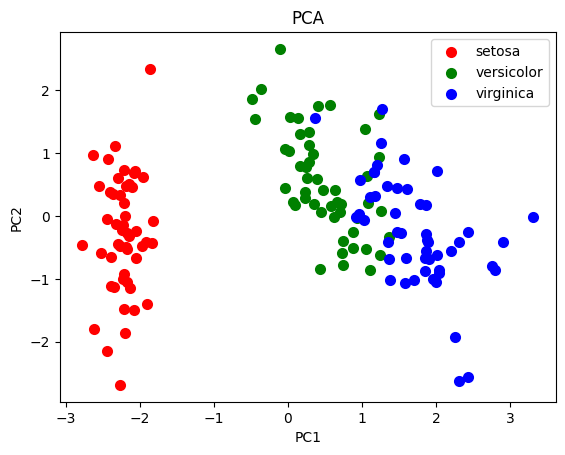

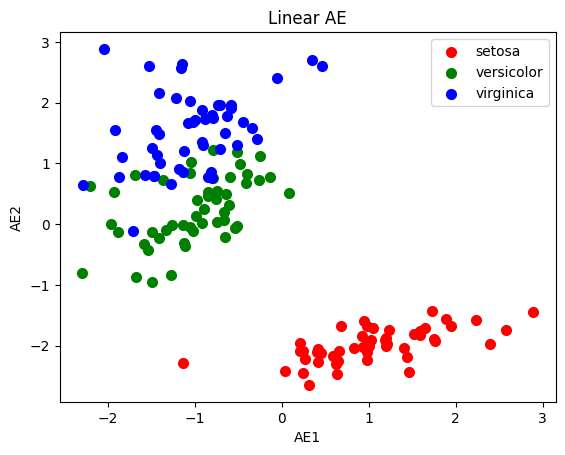

In [ ]:
plot3clusters(project_x[:,:2], 'PCA', 'PC') 
plot3clusters(X_encoded[:,:2], 'Linear AE', 'AE')

# Implementing an Autoencoder in PyTorch

## Setup

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

## Set our seed and other configurations for reproducibility.

In [ ]:
# Use GPU if available 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
seed = 42
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [ ]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

## We set the batch size, the number of training epochs, and the learning rate.

In [ ]:
batch_size = 64
learning_rate = 1e-3

## Dataset

#### We load our MNIST dataset using the torchvision package.

In [ ]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# load the training and test datasets
train_data = datasets.MNIST(root='~/.pytorch/MNIST_data/', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='~/.pytorch/MNIST_data/', train=False,
                                  download=True, transform=transform)

# Create training and test dataloaders
num_workers = 0
# how many samples per batch to load
batch_size = 64

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

In [ ]:
examples = iter(train_loader)
example_data, example_targets = next(examples)
print(example_data.shape)
print(example_targets)

torch.Size([64, 1, 28, 28])
tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0])


In [ ]:
dataiter = iter(train_loader)
images,labels = next(dataiter)
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


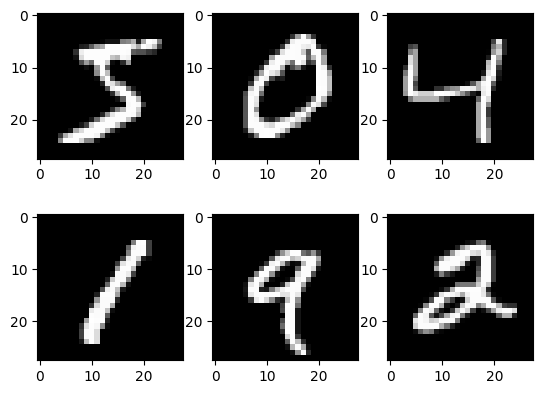

In [ ]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

# Denoising Autoencoder

##### Using sigmoid as activation function of the output layer

In [ ]:
class AE(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.encoder_hidden_layer = nn.Linear(
            in_features=kwargs["input_shape"], out_features=128
        )
        self.encoder_output_layer = nn.Linear(
            in_features=128, out_features=64
        )
        self.decoder_hidden_layer = nn.Linear(
            in_features=64, out_features=128
        )
        self.decoder_output_layer = nn.Linear(
            in_features=128, out_features=kwargs["input_shape"]
        )

    def forward(self, features):
        out1 = self.encoder_hidden_layer(features)
        activation = torch.relu(out1)
        out2 = self.encoder_output_layer(activation)
        activation1 = torch.sigmoid(out2)
        out3 = self.decoder_hidden_layer(activation1)
        activation2 = torch.relu(out3)
        out4 = self.decoder_output_layer(activation2)
        reconstructed = torch.sigmoid(out4)
        return reconstructed

#### MSE used as metric

Before using our defined autoencoder class, we have the following things to do: 1. We configure which device we want to run on. 2. We instantiate an AE object. 3. We define our optimizer. 4. We define our reconstruction loss.

In [ ]:
#  use gpu if available
device = "cuda" if torch.cuda.is_available() else "cpu"

# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model = AE(input_shape=784).to(device)

# create an optimizer object
# Adam optimizer with learning rate 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# mean-squared error loss
criterion = nn.MSELoss()

### train the model

In [ ]:
#number of epochs to train the model
n_epochs = 20

# for adding noise to images
noise_factor=0.5
loss =[]
for epoch in range(1, n_epochs+1):
    # monitor training loss
    
    loss1 = []
    ###################
    # train the model #
    ###################
    #for data in train_loader:
    for batch_features, _ in train_loader:
        # _ stands in for labels, here
        # no need to flatten images
        #images, _ = data
        batch_features = batch_features.view(-1, 784).to(device)
        
        ## add random noise to the input images
        
        #noisy_imgs = batch_features + noise_factor * torch.randn(*batch_features.shape)

        noisy_imgs = batch_features + noise_factor * torch.normal(mean=0, std=noise_factor, size=batch_features.shape).to(device)
        # Clip the images to be between 0 and 1
        noisy_imgs = torch.clip(noisy_imgs, 0., 1.)
                
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        ## forward pass: compute predicted outputs by passing *noisy* images to the model
        outputs = model(noisy_imgs)
        # calculate the loss
        # the "target" is still the original, not-noisy images
        train_loss = criterion(outputs, batch_features)
        # backward pass: compute gradient of the loss with respect to model parameters
        train_loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        #train_loss += loss.item()*batch_features.size(0)
        loss1.append(train_loss.detach())  
    # print avg training statistics 
    #train_loss = train_loss/len(train_loader)
    loss.append(np.mean(loss1))
    # print('Epoch: {} \tTraining Loss: {:.6f}'.format(
    #     epoch, 
    #     train_loss
    #     ))

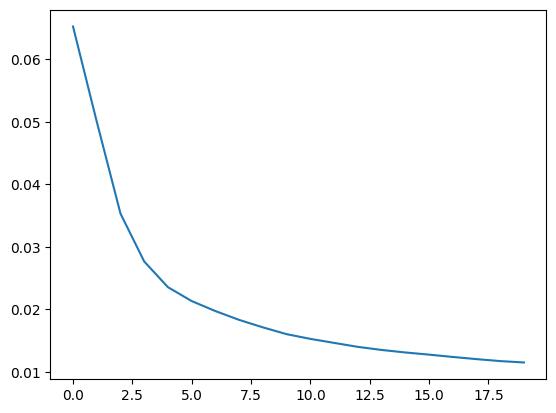

In [ ]:
plt.plot(loss)

In [ ]:
#number of epochs to train the model
n_epochs = 20

# for adding noise to images
noise_factor=0.5

for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    #for data in train_loader:
    for batch_features, _ in train_loader:
        # _ stands in for labels, here
        # no need to flatten images
        #images, _ = data
        batch_features = batch_features.view(-1, 784).to(device)
        
        ## add random noise to the input images
        
        #noisy_imgs = batch_features + noise_factor * torch.randn(*batch_features.shape)

        noisy_imgs = batch_features + noise_factor * torch.normal(mean=0, std=noise_factor, size=batch_features.shape).to(device)
        # Clip the images to be between 0 and 1
        noisy_imgs = torch.clip(noisy_imgs, 0., 1.)
                
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        ## forward pass: compute predicted outputs by passing *noisy* images to the model
        outputs = model(noisy_imgs)
        # calculate the loss
        # the "target" is still the original, not-noisy images
        loss = criterion(outputs, batch_features)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*batch_features.size(0)
            
    # print avg training statistics 
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.723443
Epoch: 2 	Training Loss: 0.712692
Epoch: 3 	Training Loss: 0.701980
Epoch: 4 	Training Loss: 0.693461
Epoch: 5 	Training Loss: 0.681964
Epoch: 6 	Training Loss: 0.671410
Epoch: 7 	Training Loss: 0.662719
Epoch: 8 	Training Loss: 0.652874
Epoch: 9 	Training Loss: 0.644701
Epoch: 10 	Training Loss: 0.636521
Epoch: 11 	Training Loss: 0.629714
Epoch: 12 	Training Loss: 0.622987
Epoch: 13 	Training Loss: 0.617398
Epoch: 14 	Training Loss: 0.611846
Epoch: 15 	Training Loss: 0.606458
Epoch: 16 	Training Loss: 0.601963
Epoch: 17 	Training Loss: 0.597692
Epoch: 18 	Training Loss: 0.594235
Epoch: 19 	Training Loss: 0.589663
Epoch: 20 	Training Loss: 0.587039


####  plot the first ten input images and then reconstructed images

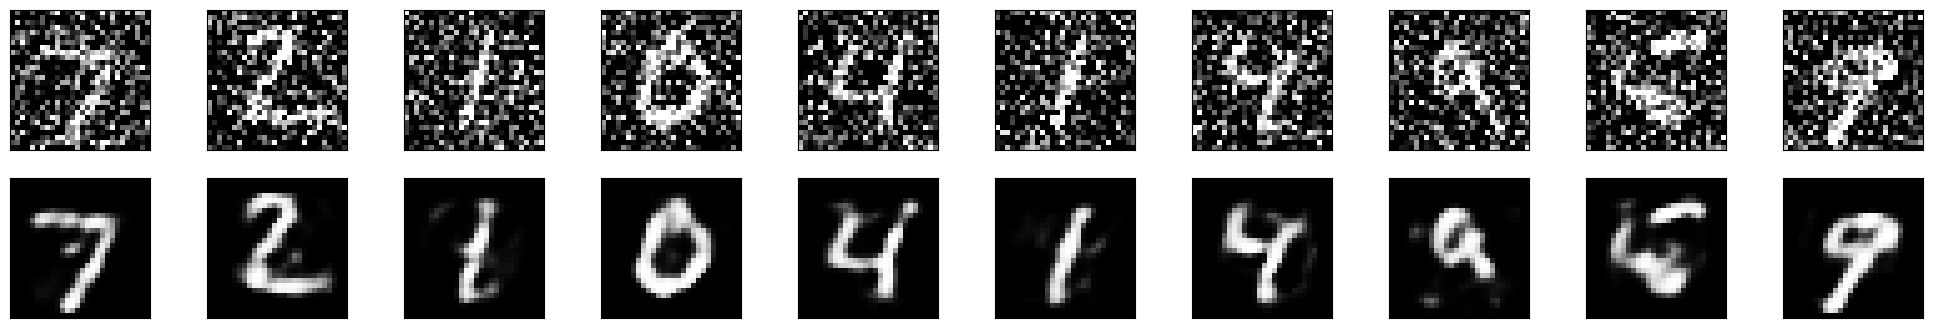

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)
images = images.view(-1, 784).to(device)
# add noise to the test images
#noisy_imgs = images + noise_factor * torch.randn(*images.shape)
noisy_imgs = images + torch.normal(mean=0, std=noise_factor, size=images.shape).to(device)
noisy_imgs = torch.clip(noisy_imgs, 0., 1.)

# get sample outputs
output = model(noisy_imgs)
# prep images for display
noisy_imgs = noisy_imgs.cpu().numpy()

# output is resized into a batch of iages
output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.cpu().detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for noisy_imgs, row in zip([noisy_imgs, output], axes):
    for img, ax in zip(noisy_imgs, row):
        #print(np.squeeze(img).shape)
        #print(img)
        #print(row.shape)
        ax.imshow(img.reshape((28, 28)), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# peak signal-to-noise ratio (PSNR) 

The term peak signal-to-noise ratio (PSNR) is an expression for the ratio between the maximum possible value (power) of a signal and the power of distorting noise that affects the quality of its representation.


Typical values for the PSNR in lossy image and video compression are between 30 and 50 dB, where higher is better. Values over 40 dB are normally considered very good and those below 20 dB are normally unacceptable.

$$ PSNR = 10 \log_{10} (\frac{MAX^2_I}{MSE})$$  

$$ PSNR = 20 \log_{10} (\frac{MAX_I}{\sqrt{MSE}})$$ \\

Here, MAXI is the maximum possible pixel value of the image. When the pixels are represented using 8 bits per sample, this is 255. More generally, when samples are represented using linear PCM with B bits per sample, MAXI is $2^B − 1$. \\

With $MAX_I=2^8 − 1$ in our case.

In [ ]:
total_mse = 0.0

with torch.no_grad():
    for batch_features, _ in test_loader:
        # flatten the batch of images
        batch_features = batch_features.view(-1, 784).to(device)
        
        # add noise to the batch of images
        noisy_imgs = batch_features + noise_factor * torch.normal(mean=0, std=noise_factor, size=batch_features.shape).to(device)
        noisy_imgs = torch.clip(noisy_imgs, 0., 1.)
        
        # obtain the denoised output images
        outputs = model(noisy_imgs)
        
        total_mse += ((outputs - batch_features)**2).sum().item()
        
# calculate the average loss and MSE over all batches
avg_mse = total_mse / len(test_loader.dataset)

# calculate the PSNR as a measure of accuracy
psnr = 20 * np.log10(255 / np.sqrt(avg_mse))

print("PSNR: {:.2f} db".format(psnr))


PSNR: 39.52 db


# Contractive AutoEncoder

Contractive provides the implementation of the auto-encoder with a loss of 2 terms: (1) Reconstruction, (2) Contraction or Jacobian of encoder 

$$J =\sum_{x \in \ D_n} L(x,g(f(x))+ Λ \lVert J_f (x) \rVert^2_F  $$

With \\
$f$ : encoding function \\
$g$ : decoding function \\
L: MSE in our case \\
$$ \lVert J_f (x) \rVert^2_F = \sum_{i,j} (\frac{∂h_j(x)}{∂ x_i})^2$$

With \\
 x: input vector \\
 h: encoding vector \\

$\textbf{Implementation details and Jacobian calculations}$

1 layer of sigmoid

$z_j=W_ix_i+b_j$

$h_j=sigmoid(z_j) = \sigma(z_j) $


Compute $\frac{∂ h_j}{∂ x_i}$

$$\frac{∂ h_j}{∂ x_i}=\frac{∂ σ(z_j)}{∂ x_i}= \frac{∂ σ(z_j)}{∂ z_j} × \frac{∂ z_j}{∂ x_i}$$

$$=σ(z_j) (1-σ(z_j))w_i$$

$$\frac{∂ h_j}{∂ x_i}=h_j (1-h_j)w_i$$

$\lVert J_f (x) \rVert^2_F= \sum_{i,j} \frac{∂ h_j}{∂ x_i}=\sum_{i,j} [h_j (1-h_j)] ^2 [w^T_{ji}]^2 $

Therefore
In the case of a sigmoid nonlinearity, the penalty on
the Jacobian norm has the following simple expression:

$$\lVert J_f (x) \rVert^2_F= \sum_{j=1}^{d_h} [h_j (1-h_j)] ^2 \sum_{i=1}^{dx} [w^T_{ji}]^2$$

with
$d_h$: number of hidden dimension of the encoding layer \\
$d_x$ : number of input dimension \\
$w$ is of shape $[d_h , d_x]$

## Using sigmoid as activation function of the output layer

# AutoEncoder (Overcomplete) without Contractive

In [ ]:
class AE(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.Sigmoid()
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )
        
        
    def forward(self, x):
      out = self.encoder(x)
      x_recon = self.decoder(out)
      return x_recon 

# Hyperparameter

In [ ]:
# Example usage
input_dim = 784 # number of input features
hidden_dim = 800 # number of neurons in the hidden layer
num_epochs = 20 # number of training epochs
batch_size = 64 # batch size for training

# MSE used as metric
Before using our defined autoencoder class, we have the following things to do: 1. We configure which device we want to run on. 2. We instantiate an AE object. 3. We define our optimizer. 4. We define our reconstruction loss.

In [ ]:
#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model = AE(input_dim, hidden_dim).to(device)

# create an optimizer object
# Adam optimizer with learning rate 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# mean-squared error loss
criterion = nn.MSELoss()

### Train the model

In [ ]:
loss =[]
for epoch in range(num_epochs):
    loss1 = []
    for batch_features, _ in train_loader:
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        batch_features = batch_features.view(-1, 784).to(device)
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = model(batch_features)
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        #loss += train_loss.item()
        loss1.append(train_loss.detach()) 
    
    # compute the epoch training loss
    #loss = loss / len(train_loader)
    loss.append(np.mean(loss1))
    # display the epoch training loss
    # print("epoch : {}/{}, recon loss = {:.8f}".format(epoch + 1, num_epochs, loss))

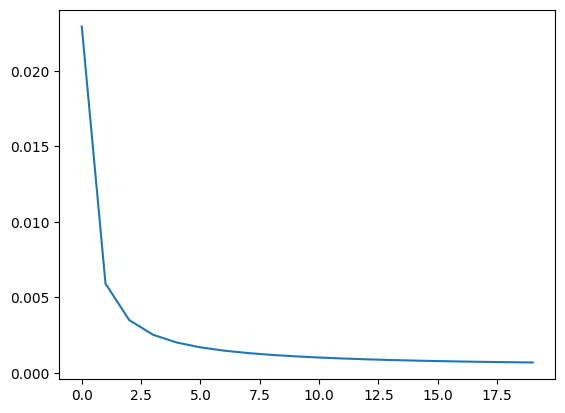

In [ ]:
plt.plot(loss)

In [ ]:
for epoch in range(num_epochs):
    loss = 0
    for batch_features, _ in train_loader:
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        batch_features = batch_features.view(-1, 784).to(device)
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = model(batch_features)
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, recon loss = {:.8f}".format(epoch + 1, num_epochs, loss))

epoch : 1/20, recon loss = 0.00067629
epoch : 2/20, recon loss = 0.00066246
epoch : 3/20, recon loss = 0.00065055
epoch : 4/20, recon loss = 0.00063989
epoch : 5/20, recon loss = 0.00063069
epoch : 6/20, recon loss = 0.00062221
epoch : 7/20, recon loss = 0.00061450
epoch : 8/20, recon loss = 0.00060807
epoch : 9/20, recon loss = 0.00060187
epoch : 10/20, recon loss = 0.00059609
epoch : 11/20, recon loss = 0.00059087
epoch : 12/20, recon loss = 0.00058618
epoch : 13/20, recon loss = 0.00058172
epoch : 14/20, recon loss = 0.00057786
epoch : 15/20, recon loss = 0.00057450
epoch : 16/20, recon loss = 0.00057106
epoch : 17/20, recon loss = 0.00056796
epoch : 18/20, recon loss = 0.00056458
epoch : 19/20, recon loss = 0.00056177
epoch : 20/20, recon loss = 0.00055946


### Test model

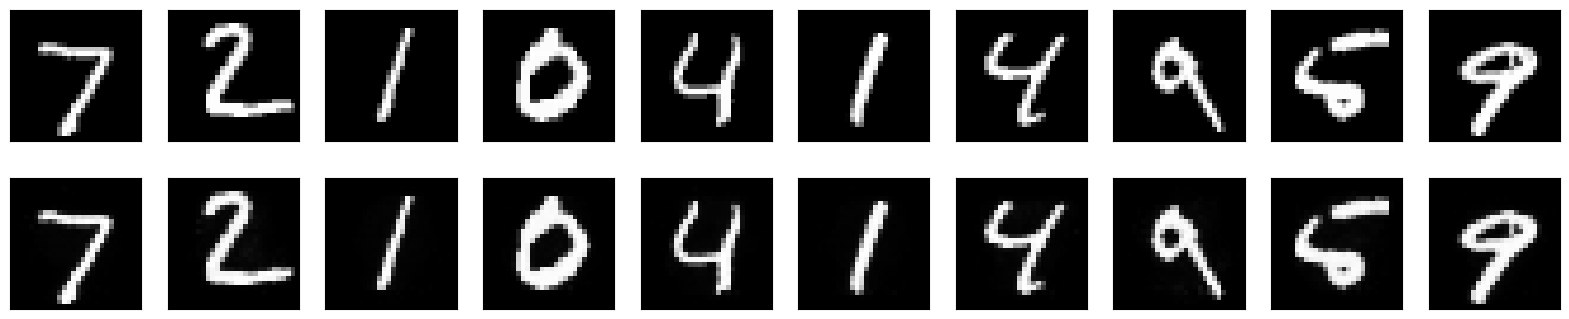

In [ ]:
with torch.no_grad():
    for batch_features in test_loader:
        batch_features = batch_features[0]
        test_examples = batch_features.view(-1, 784).to(device)
        reconstruction = model(test_examples)
        break

with torch.no_grad():
    number = 10
    plt.figure(figsize=(20, 4))
    for index in range(number):
        # display original
        ax = plt.subplot(2, number, index + 1)
        plt.imshow(test_examples[index].cpu().numpy().reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, number, index + 1 + number)
        plt.imshow(reconstruction[index].cpu().numpy().reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

## peak signal-to-noise ratio (PSNR)

In [ ]:
import torch

def psnr_scae(model, test_loader):
    model.eval()
    mse_sum = 0
    num_examples = 0
    with torch.no_grad():
        for data, _ in test_loader:
            x = data.view(data.size(0), -1).to(device)
            x_recon = model(x)
            mse_sum += torch.sum((x - x_recon) ** 2)
            num_examples += x.size(0)
    mse = mse_sum / num_examples
    psnr = 20 * torch.log10(torch.tensor(255.0).to(device)).to(device) - 10 * torch.log10(mse).to(device)
    return psnr.item()
psnr=psnr_scae(model, test_loader)
print('PSNR: {:.2f} dB'.format(psnr))

PSNR: 50.49 dB


## Contractive (Overcomplete) AutoEncoder

In [ ]:
class ContractiveAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, contractive_coeff=1e-4):
        super(ContractiveAutoencoder, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.contractive_coeff = contractive_coeff
        
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.Sigmoid()
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )
        
        
    def forward(self, x):
      h = self.encoder(x)
      x_recon = self.decoder(h)
      return x_recon, h.view(-1, self.hidden_dim, 1).expand(-1, -1, self.input_dim)

    def contractive_loss(self, x, x_recon, h):
      mse = nn.MSELoss()(x, x_recon)
      dh_dx = h * (1 - h) # derivative of the sigmoid activation function
      w = self.encoder[0].weight
      contractive = torch.sum(dh_dx**2 * torch.sum(w**2, dim=0), dim=0)
      return mse + self.contractive_coeff * contractive.mean()

## MSE used as metric
Before using our defined autoencoder class, we have the following things to do:  1. We instantiate an ContractiveAutoencoder object. 2. We define our optimizer. 3. We define our reconstruction loss.

In [ ]:
# Create CAE model
model1 = ContractiveAutoencoder(input_dim, hidden_dim).to(device)

# Define optimizer and loss function
optimizer = optim.Adam(model1.parameters())
criterion = model1.contractive_loss

## Train the model

In [ ]:
# Train the model
for epoch in range(num_epochs):
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        optimizer.zero_grad()
        x = data.view(data.size(0), -1).to(device)
        x_recon, h = model1(x)
        #print(x.shape)
        #print(x_recon.shape)
        #print(z.shape)
        loss = criterion(x, x_recon, h)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    print('Epoch: {} Train loss: {:.4f}'.format(epoch, train_loss / len(train_loader)))

Epoch: 0 Train loss: 0.0236
Epoch: 1 Train loss: 0.0073
Epoch: 2 Train loss: 0.0051
Epoch: 3 Train loss: 0.0041
Epoch: 4 Train loss: 0.0036
Epoch: 5 Train loss: 0.0032
Epoch: 6 Train loss: 0.0029
Epoch: 7 Train loss: 0.0027
Epoch: 8 Train loss: 0.0025
Epoch: 9 Train loss: 0.0024
Epoch: 10 Train loss: 0.0023
Epoch: 11 Train loss: 0.0022
Epoch: 12 Train loss: 0.0021
Epoch: 13 Train loss: 0.0021
Epoch: 14 Train loss: 0.0020
Epoch: 15 Train loss: 0.0019
Epoch: 16 Train loss: 0.0019
Epoch: 17 Train loss: 0.0019
Epoch: 18 Train loss: 0.0018
Epoch: 19 Train loss: 0.0018


## Show original and reconstructed images

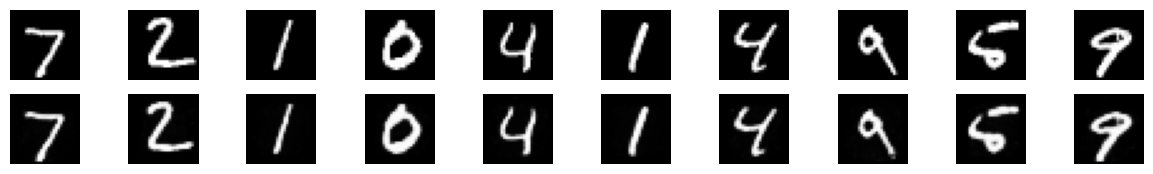

In [ ]:
# Set model to evaluation mode
plt.figure(figsize=(15, 2))

model1.eval()

# Reconstruct test images
with torch.no_grad():
    for data, _ in test_loader:
        x = data.view(data.size(0), -1).to(device)
        x_recon, z = model1(x)
        recon_images = x_recon.view(-1, 1, 28, 28).to(device)
        original_images = x.view(-1, 1, 28, 28).to(device)
        # Show original and reconstructed images
        for i in range(10):
            plt.subplot(2, 10, i + 1)
            plt.imshow(original_images[i].squeeze().cpu().numpy(), cmap='gray')
            plt.axis('off')
            plt.subplot(2, 10, i + 11)
            plt.imshow(recon_images[i].squeeze().cpu().numpy(), cmap='gray')
            plt.axis('off')
        plt.show()
        break

## peak signal-to-noise ratio (PSNR)

In [ ]:
import torch

def psnr_cae(model, test_loader):
    model.eval()
    mse_sum = 0
    num_examples = 0
    with torch.no_grad():
        for data, _ in test_loader:
            x = data.view(data.size(0), -1).to(device)
            x_recon, _ = model(x)
            mse_sum += torch.sum((x - x_recon) ** 2)
            num_examples += x.size(0)
    mse = mse_sum / num_examples
    psnr = 20 * torch.log10(torch.tensor(255.0).to(device)).to(device) - 10 * torch.log10(mse).to(device)
    return psnr.item()
pnsr=psnr_cae(model1, test_loader)
print('PSNR: {:.2f} dB'.format(psnr))

PSNR: 49.68 dB
